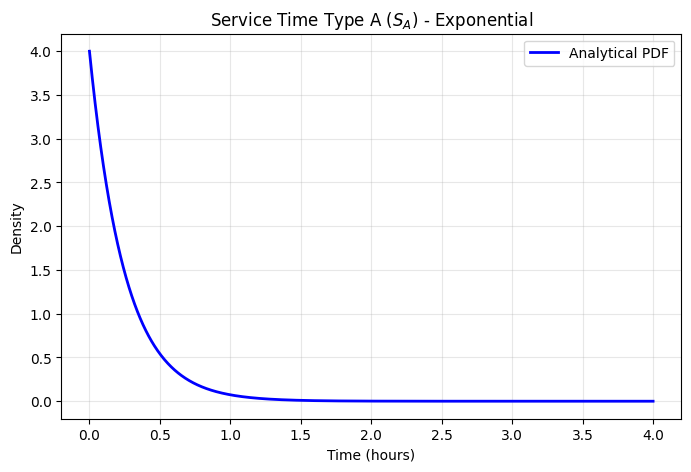

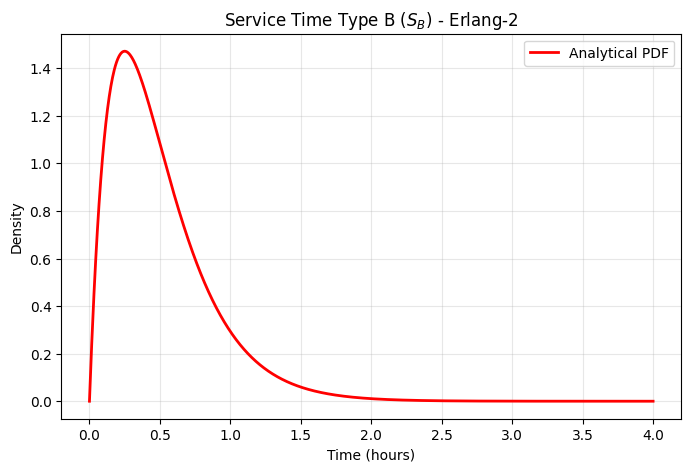

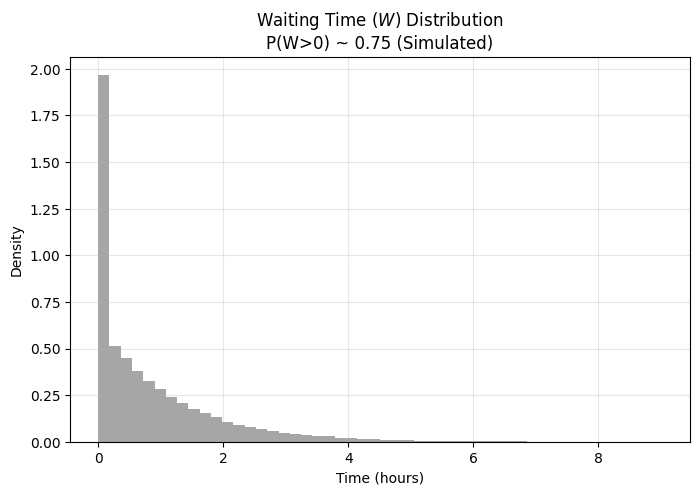

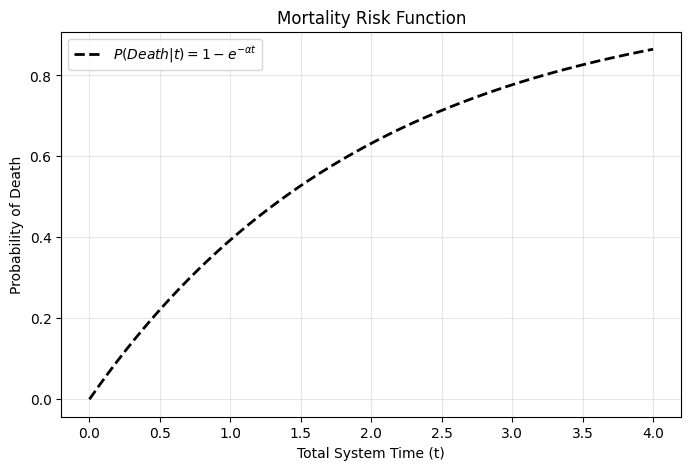

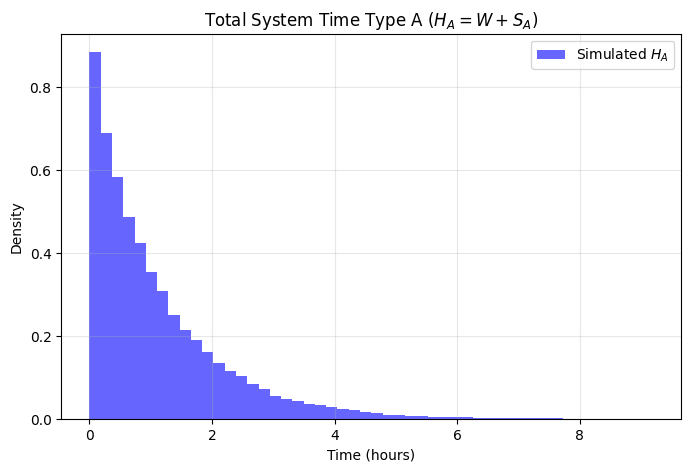

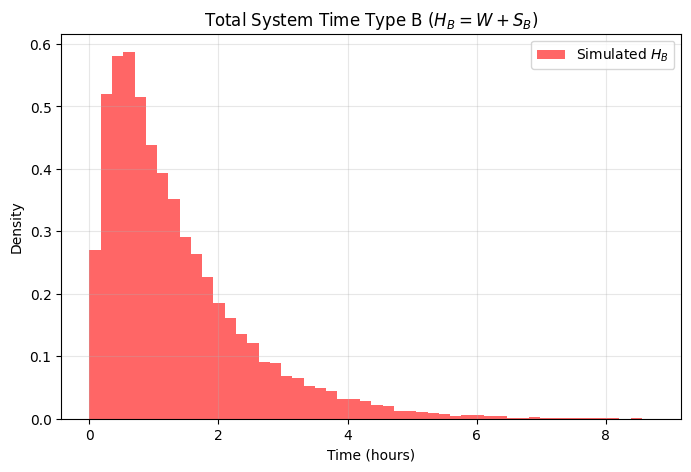

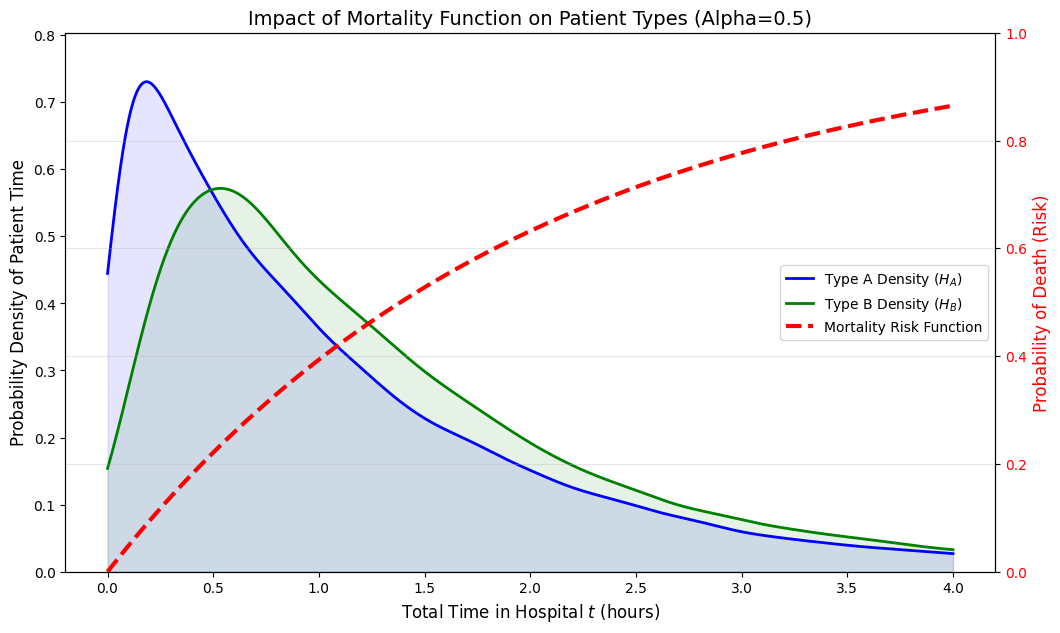

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


def plot_all():
  lambda_A = 2.0
  lambda_B = 0.5
  mu_A = 4.0
  mu_B = 2.0
  alpha = 0.5
  num_patients = 100000

  p_A = lambda_A / (lambda_A + lambda_B)
  types = np.random.choice(['A', 'B'], size=num_patients, p=[p_A, 1 - p_A])

  lambda_total = lambda_A + lambda_B
  interarrivals = np.random.exponential(
    scale=1 / lambda_total, size=num_patients)
  # arrival_times = np.cumsum(interarrivals)

  service_times = np.zeros(num_patients)
  for i in range(num_patients):
    if types[i] == 'A':
      service_times[i] = np.random.exponential(scale=1 / mu_A)
    else:
      service_times[i] = np.random.gamma(shape=2, scale=1 / (2 * mu_B))

  waiting_times = np.zeros(num_patients)
  total_times = np.zeros(num_patients)

  for i in range(1, num_patients):
    w_val = waiting_times[i - 1] + service_times[i - 1] - interarrivals[i]
    waiting_times[i] = max(0, w_val)

  total_times = waiting_times + service_times
  H_A = total_times[types == 'A']
  H_B = total_times[types == 'B']

  t = np.linspace(0, 4, 1000)

  plt.figure(figsize=(8, 5))
  pdf_sa = stats.expon.pdf(t, scale=1 / mu_A)
  plt.plot(t, pdf_sa, 'b-', lw=2, label='Analytical PDF')
  plt.title('Service Time Type A ($S_A$) - Exponential')
  plt.xlabel('Time (hours)')
  plt.ylabel('Density')
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.show()

  plt.figure(figsize=(8, 5))
  pdf_sb = stats.gamma.pdf(t, a=2, scale=1 / (2 * mu_B))
  plt.plot(t, pdf_sb, 'r-', lw=2, label='Analytical PDF')
  plt.title('Service Time Type B ($S_B$) - Erlang-2')
  plt.xlabel('Time (hours)')
  plt.ylabel('Density')
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.show()

  plt.figure(figsize=(8, 5))
  prob_wait = np.mean(waiting_times > 0.001)
  plt.hist(waiting_times, bins=50, density=True, color='gray', alpha=0.7)
  plt.title(
    f'Waiting Time ($W$) Distribution\nP(W>0) ~ {prob_wait:.2f} (Simulated)')
  plt.xlabel('Time (hours)')
  plt.ylabel('Density')
  plt.grid(True, alpha=0.3)
  plt.show()

  plt.figure(figsize=(8, 5))
  risk = 1 - np.exp(-alpha * t)
  plt.plot(t, risk, 'k--', lw=2, label=r'$P(Death|t) = 1 - e^{-\alpha t}$')
  plt.title('Mortality Risk Function')
  plt.xlabel('Total System Time (t)')
  plt.ylabel('Probability of Death')
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.show()

  plt.figure(figsize=(8, 5))
  plt.hist(H_A, bins=50, density=True, color='blue',
           alpha=0.6, label='Simulated $H_A$')
  plt.title('Total System Time Type A ($H_A = W + S_A$)')
  plt.xlabel('Time (hours)')
  plt.ylabel('Density')
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.show()

  plt.figure(figsize=(8, 5))
  plt.hist(H_B, bins=50, density=True, color='red',
           alpha=0.6, label='Simulated $H_B$')
  plt.title('Total System Time Type B ($H_B = W + S_B$)')
  plt.xlabel('Time (hours)')
  plt.ylabel('Density')
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.show()

  fig, ax1 = plt.subplots(figsize=(12, 7))

  kde_A = stats.gaussian_kde(H_A)
  kde_B = stats.gaussian_kde(H_B)

  ax1.plot(t, kde_A(t), color='blue', lw=2, label='Type A Density ($H_A$)')
  ax1.fill_between(t, kde_A(t), color='blue', alpha=0.1)
  ax1.plot(t, kde_B(t), color='green', lw=2, label='Type B Density ($H_B$)')
  ax1.fill_between(t, kde_B(t), color='green', alpha=0.1)

  ax1.set_xlabel('Total Time in Hospital $t$ (hours)', fontsize=12)
  ax1.set_ylabel('Probability Density of Patient Time', fontsize=12)
  ax1.tick_params(axis='y')
  ax1.set_ylim(0, max(kde_A(t).max(), kde_B(t).max()) * 1.1)

  ax2 = ax1.twinx()
  mortality_curve = 1 - np.exp(-alpha * t)
  ax2.plot(t, mortality_curve, color='red', linestyle='--', lw=3,
           label='Mortality Risk Function')
  ax2.set_ylabel('Probability of Death (Risk)', color='red', fontsize=12)
  ax2.tick_params(axis='y', labelcolor='red')
  ax2.set_ylim(0, 1.0)

  lines_1, labels_1 = ax1.get_legend_handles_labels()
  lines_2, labels_2 = ax2.get_legend_handles_labels()
  ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
             loc='center right', frameon=True, fontsize=10)

  plt.title('Impact of Mortality Function on Patient Types (Alpha=0.5)', fontsize=14)
  plt.grid(True, alpha=0.3)
  plt.show()


def main():
  plot_all()


if __name__ == '__main__':
  main()